In [9]:
import pandas
from matplotlib import pyplot
import seaborn
from collections import ChainMap

data = pandas.read_csv("../data.csv")
data.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
data

,Class,Organization,Raw Count,Document Counts,Mentions per Document
0,CCP,Committee,100,8,12.500000
1,China,Committee,125,8,15.625000
2,Xi Jinping,Committee,13,8,1.625000
3,Beijing,Committee,42,8,5.250000
4,Central Committee,Committee,2,8,0.250000
5,PLA,Committee,5,8,0.625000
6,China,AP News,714,79,9.037975
7,Beijing,AP News,198,79,2.506329
8,Xi Jinping,AP News,32,79,0.405063
9,CCP,AP News,23,79,0.291139


In [10]:
classes = {
    "Political Figures":
        {
            'Xi Jinping': ['xi jinping'],
            'Mao Ning': ['mao ning'],
            'Qin Gang': ['qin gang']
        },
    "Political Entities":
        {
            "CCP": ["the chinese communist party's", 'the chinese communist party',
                                        'chinese communist party', 'communist party', 'the ccp', 'ccp'],
            "Central Committee": ['the central committee', 'central committee'],
            "Chinese Embassy": ['the chinese embassy'],
            "PLA": ['pla', "people's liberation army", "the people's liberation army"]
        },
    "Geopolitical Entities":
        {
            "China": ['china', "the people's republic of china"],
            "Beijing": ['beijing'],
            "Zhongnanhai": ['zhongnanhai']
        }
}

In [11]:
data = data[data['Class'].isin(["Xi Jinping", "CCP", "Central Committee", "China", "Beijing"])]

In [12]:
data_counts = data[["Class", "Organization", "Raw Count"]].set_index(['Organization', 'Class'])["Raw Count"].unstack()
data_counts = data_counts[["China", "Beijing", "CCP", "Central Committee", "Xi Jinping"]]
data_counts = data_counts.reindex(["Committee", "AP News", "CNN", "Fox News", "Reuters"])
data_class_counts = data_counts.groupby(data_counts.columns.map(dict(ChainMap(*[{item: class_ for item in list(classes[class_].keys())} for class_ in classes]))), axis=1).sum()
data_counts.drop(columns=["Central Committee"], inplace=True, errors='ignore')
data_counts

Class,China,Beijing,CCP,Xi Jinping
Organization,,,,
Committee,125.0,42.0,100.0,13.0
AP News,714.0,198.0,23.0,32.0
CNN,374.0,158.0,11.0,23.0
Fox News,433.0,71.0,28.0,36.0
Reuters,323.0,87.0,2.0,12.0


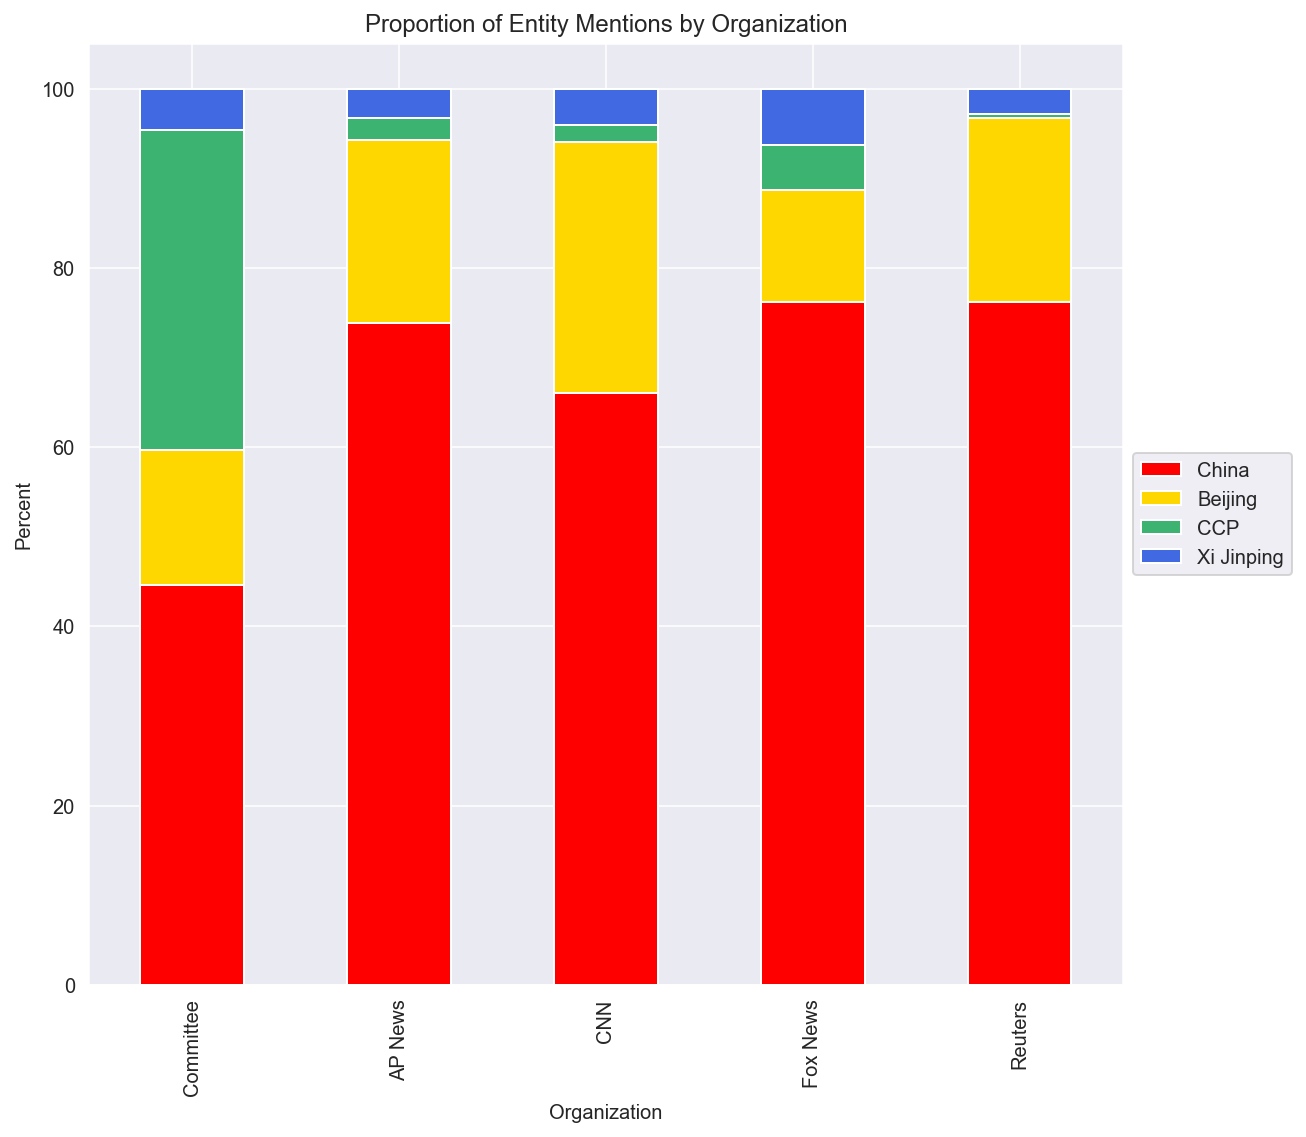

In [20]:
from matplotlib import colors

my_cmap = colors.ListedColormap(['red', 'gold', 'mediumseagreen', 'royalblue'])

fig, axis = pyplot.subplots(dpi=144, figsize=(8, 8))
(data_counts.div(data_counts.sum(axis=1), axis=0) * 100).plot(kind='bar', stacked=True, ax=axis, cmap=my_cmap)
axis.set_title("Proportion of Entity Mentions by Organization")
axis.set_ylabel("Percent")
pyplot.tight_layout()
# fig.suptitle("References to Chinese Entities by Organizations")
axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pyplot.savefig("../analysis.png")